<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


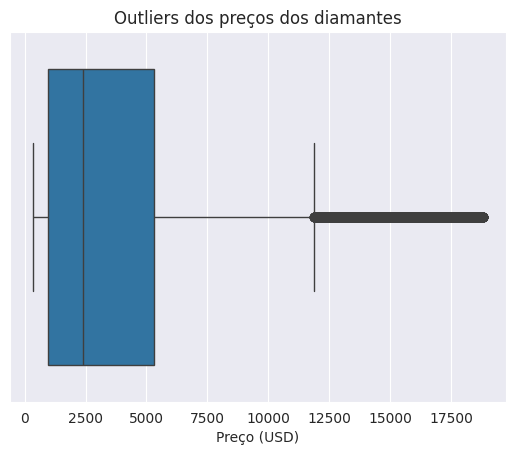

In [ ]:
# gráfico do exercício 1

diamonds = data[['price']]

with sns.axes_style('darkgrid'):
  grafico = sns.boxplot(x=diamonds['price'])
  grafico.set(title='Outliers dos preços dos diamantes',
                xlabel='Preço (USD)')


**Insight do gráfico 1**: Conforme o gráfico, os outliers estão por volta dos 11875 até os 18750 aproximadamente. Desconsiderando os outliers, a mínima está próxima de 0 e a máxima está no começo dos outliers que são aproximadamente 11875. A mediana está próxima do primeiro quartil mostrando uma assimetria positiva dos dados, com uma maior concentração de valores abaixo da mediana.



---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [2]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
import pandas as pd

# Suponha que 'diamonds' seja o seu DataFrame

# Calculando o intervalo interquartil para o preço
Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrando os dados para remover outliers
diamonds_filtered = diamonds[(diamonds['price'] >= lower_limit) & (diamonds['price'] <= upper_limit)]

# Exibindo estatísticas antes e depois da filtragem
print("Estatísticas antes da filtragem:")
print(diamonds['price'].describe())
print("\nEstatísticas depois da filtragem:")
print(diamonds_filtered['price'].describe())


Estatísticas antes da filtragem:
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

Estatísticas depois da filtragem:
count    50400.000000
mean      3159.460833
std       2764.700316
min        326.000000
25%        911.000000
50%       2155.000000
75%       4669.000000
max      11883.000000
Name: price, dtype: float64


<ipython-input-30-ce459c532296>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds['variacao_peso_preco'] = diamonds['price'] / diamonds['carat']


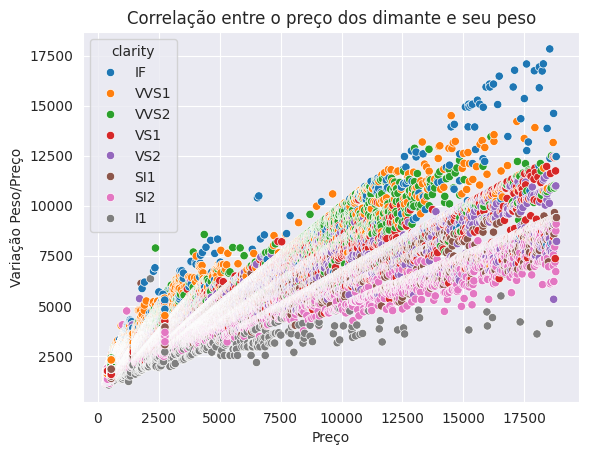

In [30]:
# gráfico do exercício 2

diamonds = data[['price', 'carat', 'clarity']]
diamonds['variacao_peso_preco'] = diamonds['price'] / diamonds['carat']


with sns.axes_style('darkgrid'):
  grafico = sns.scatterplot(data = diamonds, x='price', y='variacao_peso_preco', hue='clarity')
  grafico.set(title= 'Correlação entre o preço dos dimante e seu peso',
              xlabel = 'Preço',
              ylabel = 'Variação Peso/Preço')

**Insight do gráfico 2**: No eixo Y eu calculei a variação do peso sobre prelo, e no eixo X o preço. Da para notar que a Clarity IF é o que tem maior variação entre peso e preço, tende a ter uma linha crescente em relação as demais, sendo quanto maior o peso maior sera o preço. Enquanto a L1 tende à possuir uma tendência mais neutra em relação as demais


---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [ ]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


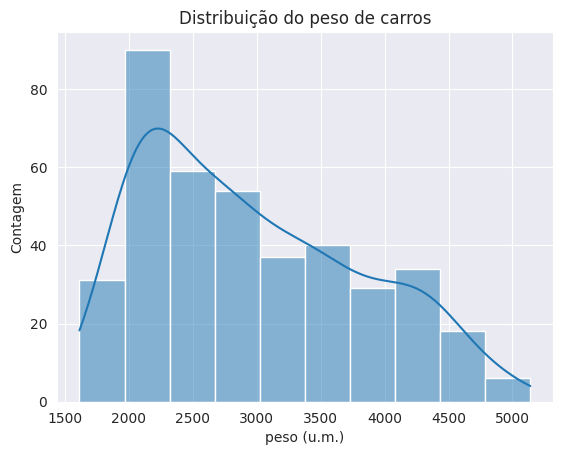

In [ ]:
# gráfico do exercício 3

cars = data[['weight']]

with sns.axes_style('darkgrid'):
  grafico = sns.histplot(x='weight',data=cars,kde=True)
  grafico.set(title='Distribuição do peso de carros',
                xlabel='Peso',
                ylabel='Contagem')

**Insight do gráfico 3**:  A distribuição do peso dos carros não segue uma distribuição normal. Além disso, a probabilidade de haver carros com pesos de até 3000 é maior, do que a probabilidade de haver carros com pesos acima de 4000. Isso sugere que a maioria dos carros no conjunto de dados tem pesos mais baixos, enquanto carros com pesos mais altos são menos comuns.

---